In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports
require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
judges = pd.read_csv('final_judges.csv')
judges

,Name of the Judge,Gender,Date of Birth,State of Birth,Place of Birth,Date of Appointment,Date of Retirement,If Died in Office,If resigned from office,Parent High Court,If transferred to any other High Court,"If yes, which High Court 1",Date of such transfer - 1,"If yes, which High Court 2",Date of such transfer – 2,"If yes, which High Court 3",Date of such transfer - 3,If appointed Chief Justice in another High Court,"If yes, which High Court – 1","If yes, which High Court – 2","If yes, which High Court – 3",If appointed to the Supreme Court,Date of appointment to the Supreme Court,Cadre,Experience in Subordinate Judiciary,Litigation Experience,If a Senior Advocate,Experience in High Court Administrative Post,If served as Counsel for Government/PSU/Statutory Body,If served as Advocate General,If empanelled by Banks,If empanelled by Private Companies,Chamber Details,Schooling Information,Graduation Institution,Graduation Specialization,Law Degree Institution,Law Degree Year,Bar Enrolment Year,State Bar Association where enrolled,Foreign Degree in Law,Post-Graduate in another subject,Post-Graduate in Law,Experience in SubordiNot Applicablete Judiciary,appointment_dt
0,Abdul Mateen,male,1951-12-14T00:00:00Z,Uttar Pradesh,Not Available,2002-12-21T00:00:00Z,2013-12-13T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,Yes,No,No,No,No,Not Available,Lucknow Unversity,Arts,LUCKNOW UNIVERSITY,1976,1976,Uttar Pradesh,No,No,No,NaN,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,1968-11-01T00:00:00Z,Not Available,Not Available,2017-09-22T00:00:00Z,2030-10-31T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,No,No,No,No,No,Not Available,Not Available,Not Available,Lucknow University,1992,1993,Uttar Pradesh,No,No,No,NaN,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,Not Available,Not Available,Not Available,1994-03-28T00:00:00Z,1997-10-31T00:00:00Z,No,No,Calcutta,Yes,Allahabad,1994-03-28T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,No,No,No,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,1956-10-07T00:00:00Z,Uttar Pradesh,Not Available,2016-04-07T00:00:00Z,2018-10-06T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,No,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Gorakhpur University,1977,Not Applicable,Not Applicable,No,No,No,NaN,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,1955-03-10T00:00:00Z,Maharashtra,Not Available,2011-03-17T00:00:00Z,2017-03-09T00:00:00Z,No,No,Bombay,Yes,Allahabad,2016-05-02T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,Yes,No,No,No,No,No,No,No,Not Available,Not Available,Not Available,Not Available,Not Available,1979,Not Available,No,No,No,NaN,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Sharad Kumar Sharma,male,1962-01-01T00:00:00Z,Uttar Pradesh,Allahabad,2017-05-19T00:00:00Z,2023-12-31T00:00:00Z,No,No,Uttarakhand,No,Not Applicable,Not Applicable,Not Applicable,No

In [6]:
judges.dtypes

Name of the Judge                                         object
Gender                                                    object
Date of Birth                                             object
State of Birth                                            object
Place of Birth                                            object
Date of Appointment                                       object
Date of Retirement                                        object
If Died in Office                                         object
If resigned from office                                   object
Parent High Court                                         object
If transferred to any other High Court                    object
If yes, which High Court 1                                object
Date of such transfer - 1                                 object
If yes, which High Court 2                                object
Date of such transfer – 2                                 object
If yes, which High Court 

In [7]:
#pd.to_datetime(judges['Date of Retirement']) 

In [8]:
#judges[judges['Date of Appointment'].str.contains('Not Available')]

In [9]:
judges = judges.drop(labels=[67, 666, 676, 692, 1107, 1108, 1115, 1442, 1447, 1487, 1522])
judges

,Name of the Judge,Gender,Date of Birth,State of Birth,Place of Birth,Date of Appointment,Date of Retirement,If Died in Office,If resigned from office,Parent High Court,If transferred to any other High Court,"If yes, which High Court 1",Date of such transfer - 1,"If yes, which High Court 2",Date of such transfer – 2,"If yes, which High Court 3",Date of such transfer - 3,If appointed Chief Justice in another High Court,"If yes, which High Court – 1","If yes, which High Court – 2","If yes, which High Court – 3",If appointed to the Supreme Court,Date of appointment to the Supreme Court,Cadre,Experience in Subordinate Judiciary,Litigation Experience,If a Senior Advocate,Experience in High Court Administrative Post,If served as Counsel for Government/PSU/Statutory Body,If served as Advocate General,If empanelled by Banks,If empanelled by Private Companies,Chamber Details,Schooling Information,Graduation Institution,Graduation Specialization,Law Degree Institution,Law Degree Year,Bar Enrolment Year,State Bar Association where enrolled,Foreign Degree in Law,Post-Graduate in another subject,Post-Graduate in Law,Experience in SubordiNot Applicablete Judiciary,appointment_dt
0,Abdul Mateen,male,1951-12-14T00:00:00Z,Uttar Pradesh,Not Available,2002-12-21T00:00:00Z,2013-12-13T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,Yes,No,No,No,No,Not Available,Lucknow Unversity,Arts,LUCKNOW UNIVERSITY,1976,1976,Uttar Pradesh,No,No,No,NaN,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,1968-11-01T00:00:00Z,Not Available,Not Available,2017-09-22T00:00:00Z,2030-10-31T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,No,No,No,No,No,Not Available,Not Available,Not Available,Lucknow University,1992,1993,Uttar Pradesh,No,No,No,NaN,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,Not Available,Not Available,Not Available,1994-03-28T00:00:00Z,1997-10-31T00:00:00Z,No,No,Calcutta,Yes,Allahabad,1994-03-28T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,No,No,No,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,1956-10-07T00:00:00Z,Uttar Pradesh,Not Available,2016-04-07T00:00:00Z,2018-10-06T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,No,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Gorakhpur University,1977,Not Applicable,Not Applicable,No,No,No,NaN,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,1955-03-10T00:00:00Z,Maharashtra,Not Available,2011-03-17T00:00:00Z,2017-03-09T00:00:00Z,No,No,Bombay,Yes,Allahabad,2016-05-02T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,Yes,No,No,No,No,No,No,No,Not Available,Not Available,Not Available,Not Available,Not Available,1979,Not Available,No,No,No,NaN,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Sharad Kumar Sharma,male,1962-01-01T00:00:00Z,Uttar Pradesh,Allahabad,2017-05-19T00:00:00Z,2023-12-31T00:00:00Z,No,No,Uttarakhand,No,Not Applicable,Not Applicable,Not Applicable,No

In [10]:
judges = judges.reset_index(drop=True)
judges

,Name of the Judge,Gender,Date of Birth,State of Birth,Place of Birth,Date of Appointment,Date of Retirement,If Died in Office,If resigned from office,Parent High Court,If transferred to any other High Court,"If yes, which High Court 1",Date of such transfer - 1,"If yes, which High Court 2",Date of such transfer – 2,"If yes, which High Court 3",Date of such transfer - 3,If appointed Chief Justice in another High Court,"If yes, which High Court – 1","If yes, which High Court – 2","If yes, which High Court – 3",If appointed to the Supreme Court,Date of appointment to the Supreme Court,Cadre,Experience in Subordinate Judiciary,Litigation Experience,If a Senior Advocate,Experience in High Court Administrative Post,If served as Counsel for Government/PSU/Statutory Body,If served as Advocate General,If empanelled by Banks,If empanelled by Private Companies,Chamber Details,Schooling Information,Graduation Institution,Graduation Specialization,Law Degree Institution,Law Degree Year,Bar Enrolment Year,State Bar Association where enrolled,Foreign Degree in Law,Post-Graduate in another subject,Post-Graduate in Law,Experience in SubordiNot Applicablete Judiciary,appointment_dt
0,Abdul Mateen,male,1951-12-14T00:00:00Z,Uttar Pradesh,Not Available,2002-12-21T00:00:00Z,2013-12-13T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,Yes,No,No,No,No,Not Available,Lucknow Unversity,Arts,LUCKNOW UNIVERSITY,1976,1976,Uttar Pradesh,No,No,No,NaN,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,1968-11-01T00:00:00Z,Not Available,Not Available,2017-09-22T00:00:00Z,2030-10-31T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,No,No,No,No,No,Not Available,Not Available,Not Available,Lucknow University,1992,1993,Uttar Pradesh,No,No,No,NaN,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,Not Available,Not Available,Not Available,1994-03-28T00:00:00Z,1997-10-31T00:00:00Z,No,No,Calcutta,Yes,Allahabad,1994-03-28T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,No,No,No,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,1956-10-07T00:00:00Z,Uttar Pradesh,Not Available,2016-04-07T00:00:00Z,2018-10-06T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,No,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Gorakhpur University,1977,Not Applicable,Not Applicable,No,No,No,NaN,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,1955-03-10T00:00:00Z,Maharashtra,Not Available,2011-03-17T00:00:00Z,2017-03-09T00:00:00Z,No,No,Bombay,Yes,Allahabad,2016-05-02T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,Yes,No,No,No,No,No,No,No,Not Available,Not Available,Not Available,Not Available,Not Available,1979,Not Available,No,No,No,NaN,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,Sharad Kumar Sharma,male,1962-01-01T00:00:00Z,Uttar Pradesh,Allahabad,2017-05-19T00:00:00Z,2023-12-31T00:00:00Z,No,No,Uttarakhand,No,Not Applicable,Not Applicable,Not Applicable,No

In [11]:
judges[judges['Date of Appointment'].str.contains('2916')]

,Name of the Judge,Gender,Date of Birth,State of Birth,Place of Birth,Date of Appointment,Date of Retirement,If Died in Office,If resigned from office,Parent High Court,If transferred to any other High Court,"If yes, which High Court 1",Date of such transfer - 1,"If yes, which High Court 2",Date of such transfer – 2,"If yes, which High Court 3",Date of such transfer - 3,If appointed Chief Justice in another High Court,"If yes, which High Court – 1","If yes, which High Court – 2","If yes, which High Court – 3",If appointed to the Supreme Court,Date of appointment to the Supreme Court,Cadre,Experience in Subordinate Judiciary,Litigation Experience,If a Senior Advocate,Experience in High Court Administrative Post,If served as Counsel for Government/PSU/Statutory Body,If served as Advocate General,If empanelled by Banks,If empanelled by Private Companies,Chamber Details,Schooling Information,Graduation Institution,Graduation Specialization,Law Degree Institution,Law Degree Year,Bar Enrolment Year,State Bar Association where enrolled,Foreign Degree in Law,Post-Graduate in another subject,Post-Graduate in Law,Experience in SubordiNot Applicablete Judiciary,appointment_dt


In [12]:
judges['Date of Appointment'][1621] = judges['Date of Appointment'][1621].replace('2916-04-07T00:00:00Z', '2006-04-07T00:00:00Z')
judges['Date of Appointment'][1621]

'2018-11-19T00:00:00Z'

In [13]:
judges['appointment_dt'] = pd.to_datetime(judges['Date of Appointment'])
judges

,Name of the Judge,Gender,Date of Birth,State of Birth,Place of Birth,Date of Appointment,Date of Retirement,If Died in Office,If resigned from office,Parent High Court,If transferred to any other High Court,"If yes, which High Court 1",Date of such transfer - 1,"If yes, which High Court 2",Date of such transfer – 2,"If yes, which High Court 3",Date of such transfer - 3,If appointed Chief Justice in another High Court,"If yes, which High Court – 1","If yes, which High Court – 2","If yes, which High Court – 3",If appointed to the Supreme Court,Date of appointment to the Supreme Court,Cadre,Experience in Subordinate Judiciary,Litigation Experience,If a Senior Advocate,Experience in High Court Administrative Post,If served as Counsel for Government/PSU/Statutory Body,If served as Advocate General,If empanelled by Banks,If empanelled by Private Companies,Chamber Details,Schooling Information,Graduation Institution,Graduation Specialization,Law Degree Institution,Law Degree Year,Bar Enrolment Year,State Bar Association where enrolled,Foreign Degree in Law,Post-Graduate in another subject,Post-Graduate in Law,Experience in SubordiNot Applicablete Judiciary,appointment_dt
0,Abdul Mateen,male,1951-12-14T00:00:00Z,Uttar Pradesh,Not Available,2002-12-21T00:00:00Z,2013-12-13T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,Yes,No,No,No,No,Not Available,Lucknow Unversity,Arts,LUCKNOW UNIVERSITY,1976,1976,Uttar Pradesh,No,No,No,NaN,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,1968-11-01T00:00:00Z,Not Available,Not Available,2017-09-22T00:00:00Z,2030-10-31T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Bar,No,Yes,No,Not Applicable,No,No,No,No,No,Not Available,Not Available,Not Available,Lucknow University,1992,1993,Uttar Pradesh,No,No,No,NaN,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,Not Available,Not Available,Not Available,1994-03-28T00:00:00Z,1997-10-31T00:00:00Z,No,No,Calcutta,Yes,Allahabad,1994-03-28T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,No,No,No,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,1956-10-07T00:00:00Z,Uttar Pradesh,Not Available,2016-04-07T00:00:00Z,2018-10-06T00:00:00Z,No,No,Allahabad,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,No,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Gorakhpur University,1977,Not Applicable,Not Applicable,No,No,No,NaN,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,1955-03-10T00:00:00Z,Maharashtra,Not Available,2011-03-17T00:00:00Z,2017-03-09T00:00:00Z,No,No,Bombay,Yes,Allahabad,2016-05-02T00:00:00Z,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Not Applicable,Not Applicable,No,Not Applicable,Service,Yes,Yes,No,No,No,No,No,No,No,Not Available,Not Available,Not Available,Not Available,Not Available,1979,Not Available,No,No,No,NaN,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,Sharad Kumar Sharma,male,1962-01-01T00:00:00Z,Uttar Pradesh,Allahabad,2017-05-19T00:00:00Z,2023-12-31T00:00:00Z,No,No,Uttarakhand,No,Not Applicable,Not Applicable,Not Applicable,No

In [14]:
judges.to_csv('final_judges.csv', index=False)

In [15]:
judges2 = pd.read_csv('final_judges.csv', na_values=['Not Applicable', 'Not Available'], usecols=['Name of the Judge', 'Gender', 'appointment_dt', 'Parent High Court', 'Date of Retirement', 'Date of appointment to the Supreme Court', 'Cadre'])
judges2

,Name of the Judge,Gender,Date of Retirement,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt
0,Abdul Mateen,male,2013-12-13T00:00:00Z,Allahabad,NaN,Bar,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,2030-10-31T00:00:00Z,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,1997-10-31T00:00:00Z,Calcutta,NaN,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,2018-10-06T00:00:00Z,Allahabad,NaN,Service,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,2017-03-09T00:00:00Z,Bombay,NaN,Service,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...
2005,Sharad Kumar Sharma,male,2023-12-31T00:00:00Z,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00
2006,Sudhanshu Dhulia,male,2022-08-09T00:00:00Z,Uttarakhand,NaN,Bar,2008-11-01 00:00:00+00:00
2007,Tarun Agarwala,male,2018-03-02T00:00:00Z,Allahabad,NaN,Bar,2004-01-07 00:00:00+00:00
2008,Umesh Chandra Dhyani,male,2018-02-13T00:00:00Z,Uttarakhand,NaN,Service,2011-09-13 00:00:00+00:00


In [16]:
judges2 = judges2.dropna(subset=['Date of Retirement'])

In [17]:
judges2

,Name of the Judge,Gender,Date of Retirement,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt
0,Abdul Mateen,male,2013-12-13T00:00:00Z,Allahabad,NaN,Bar,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,2030-10-31T00:00:00Z,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,1997-10-31T00:00:00Z,Calcutta,NaN,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,2018-10-06T00:00:00Z,Allahabad,NaN,Service,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,2017-03-09T00:00:00Z,Bombay,NaN,Service,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...
2005,Sharad Kumar Sharma,male,2023-12-31T00:00:00Z,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00
2006,Sudhanshu Dhulia,male,2022-08-09T00:00:00Z,Uttarakhand,NaN,Bar,2008-11-01 00:00:00+00:00
2007,Tarun Agarwala,male,2018-03-02T00:00:00Z,Allahabad,NaN,Bar,2004-01-07 00:00:00+00:00
2008,Umesh Chandra Dhyani,male,2018-02-13T00:00:00Z,Uttarakhand,NaN,Service,2011-09-13 00:00:00+00:00


In [18]:
judges2['Date of Retirement'] = pd.to_datetime(judges2['Date of Retirement'])
judges2['Date of Retirement']

0      2013-12-13 00:00:00+00:00
1      2030-10-31 00:00:00+00:00
2      1997-10-31 00:00:00+00:00
3      2018-10-06 00:00:00+00:00
4      2017-03-09 00:00:00+00:00
                  ...           
2005   2023-12-31 00:00:00+00:00
2006   2022-08-09 00:00:00+00:00
2007   2018-03-02 00:00:00+00:00
2008   2018-02-13 00:00:00+00:00
2009   2019-09-16 00:00:00+00:00
Name: Date of Retirement, Length: 1969, dtype: datetime64[ns, UTC]

In [19]:
judges2

,Name of the Judge,Gender,Date of Retirement,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt
0,Abdul Mateen,male,2013-12-13 00:00:00+00:00,Allahabad,NaN,Bar,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,2030-10-31 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,1997-10-31 00:00:00+00:00,Calcutta,NaN,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,2018-10-06 00:00:00+00:00,Allahabad,NaN,Service,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,2017-03-09 00:00:00+00:00,Bombay,NaN,Service,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...
2005,Sharad Kumar Sharma,male,2023-12-31 00:00:00+00:00,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00
2006,Sudhanshu Dhulia,male,2022-08-09 00:00:00+00:00,Uttarakhand,NaN,Bar,2008-11-01 00:00:00+00:00
2007,Tarun Agarwala,male,2018-03-02 00:00:00+00:00,Allahabad,NaN,Bar,2004-01-07 00:00:00+00:00
2008,Umesh Chandra Dhyani,male,2018-02-13 00:00:00+00:00,Uttarakhand,NaN,Service,2011-09-13 00:00:00+00:00


In [20]:
judges2.columns = judges2.columns.str.replace('Date of Retirement', 'retirement_dt')

In [21]:
judges2 = judges2.reset_index(drop=True)
judges2

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt
0,Abdul Mateen,male,2013-12-13 00:00:00+00:00,Allahabad,NaN,Bar,2002-12-21 00:00:00+00:00
1,Abdul Moin,male,2030-10-31 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00
2,Abdur Rahim Choudhary,male,1997-10-31 00:00:00+00:00,Calcutta,NaN,NaN,1994-03-28 00:00:00+00:00
3,Abhai Kumar,male,2018-10-06 00:00:00+00:00,Allahabad,NaN,Service,2016-04-07 00:00:00+00:00
4,Abhay Thipsay,male,2017-03-09 00:00:00+00:00,Bombay,NaN,Service,2011-03-17 00:00:00+00:00
...,...,...,...,...,...,...,...
1964,Sharad Kumar Sharma,male,2023-12-31 00:00:00+00:00,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00
1965,Sudhanshu Dhulia,male,2022-08-09 00:00:00+00:00,Uttarakhand,NaN,Bar,2008-11-01 00:00:00+00:00
1966,Tarun Agarwala,male,2018-03-02 00:00:00+00:00,Allahabad,NaN,Bar,2004-01-07 00:00:00+00:00
1967,Umesh Chandra Dhyani,male,2018-02-13 00:00:00+00:00,Uttarakhand,NaN,Service,2011-09-13 00:00:00+00:00


In [22]:
judges2['appointment_dt'] = pd.to_datetime(judges2['appointment_dt'])
judges2['appointment_dt']

0      2002-12-21 00:00:00+00:00
1      2017-09-22 00:00:00+00:00
2      1994-03-28 00:00:00+00:00
3      2016-04-07 00:00:00+00:00
4      2011-03-17 00:00:00+00:00
                  ...           
1964   2017-05-19 00:00:00+00:00
1965   2008-11-01 00:00:00+00:00
1966   2004-01-07 00:00:00+00:00
1967   2011-09-13 00:00:00+00:00
1968   2008-11-01 00:00:00+00:00
Name: appointment_dt, Length: 1969, dtype: datetime64[ns, UTC]

In [23]:
judges2['apt_year'] = judges2['appointment_dt'].dt.year

In [24]:
judges2

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year
0,Abdul Mateen,male,2013-12-13 00:00:00+00:00,Allahabad,NaN,Bar,2002-12-21 00:00:00+00:00,2002
1,Abdul Moin,male,2030-10-31 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017
2,Abdur Rahim Choudhary,male,1997-10-31 00:00:00+00:00,Calcutta,NaN,NaN,1994-03-28 00:00:00+00:00,1994
3,Abhai Kumar,male,2018-10-06 00:00:00+00:00,Allahabad,NaN,Service,2016-04-07 00:00:00+00:00,2016
4,Abhay Thipsay,male,2017-03-09 00:00:00+00:00,Bombay,NaN,Service,2011-03-17 00:00:00+00:00,2011
...,...,...,...,...,...,...,...,...
1964,Sharad Kumar Sharma,male,2023-12-31 00:00:00+00:00,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00,2017
1965,Sudhanshu Dhulia,male,2022-08-09 00:00:00+00:00,Uttarakhand,NaN,Bar,2008-11-01 00:00:00+00:00,2008
1966,Tarun Agarwala,male,2018-03-02 00:00:00+00:00,Allahabad,NaN,Bar,2004-01-07 00:00:00+00:00,2004
1967,Umesh Chandra Dhyani,male,2018-02-13 00:00:00+00:00,Uttarakhand,NaN,Service,2011-09-13 00:00:00+00:00,2011


In [25]:
judges2.groupby('Gender').apt_year.value_counts().unstack().fillna(0).T.reset_index().melt(id_vars=['apt_year']).to_csv('year_wise.csv', index=False)

In [26]:
year_wise = pd.read_csv('year_wise.csv')
year_wise

,apt_year,Gender,value
0,1980,female,0.0
1,1994,female,7.0
2,1995,female,2.0
3,1996,female,2.0
4,1997,female,1.0
5,1998,female,1.0
6,1999,female,3.0
7,2000,female,3.0
8,2001,female,3.0
9,2002,female,4.0


In [27]:
total_apts = year_wise.groupby('apt_year').value.sum()

In [28]:
total_apts = pd.DataFrame(total_apts)
total_apts = total_apts.reset_index()
total_apts

,apt_year,value
0,1980,1.0
1,1994,168.0
2,1995,63.0
3,1996,61.0
4,1997,48.0
5,1998,13.0
6,1999,98.0
7,2000,47.0
8,2001,56.0
9,2002,93.0


In [29]:
female_apts = year_wise[year_wise.Gender == "female"]
female_apts

,apt_year,Gender,value
0,1980,female,0.0
1,1994,female,7.0
2,1995,female,2.0
3,1996,female,2.0
4,1997,female,1.0
5,1998,female,1.0
6,1999,female,3.0
7,2000,female,3.0
8,2001,female,3.0
9,2002,female,4.0


In [30]:
male_apts = year_wise[year_wise.Gender == "male"]
male_apts.reset_index(drop=True)

,apt_year,Gender,value
0,1980,male,1.0
1,1994,male,161.0
2,1995,male,61.0
3,1996,male,59.0
4,1997,male,47.0
5,1998,male,12.0
6,1999,male,95.0
7,2000,male,44.0
8,2001,male,53.0
9,2002,male,89.0


In [31]:
year_wise2 = total_apts.merge(female_apts,on='apt_year').merge(male_apts,on='apt_year')
year_wise2

,apt_year,value_x,Gender_x,value_y,Gender_y,value
0,1980,1.0,female,0.0,male,1.0
1,1994,168.0,female,7.0,male,161.0
2,1995,63.0,female,2.0,male,61.0
3,1996,61.0,female,2.0,male,59.0
4,1997,48.0,female,1.0,male,47.0
5,1998,13.0,female,1.0,male,12.0
6,1999,98.0,female,3.0,male,95.0
7,2000,47.0,female,3.0,male,44.0
8,2001,56.0,female,3.0,male,53.0
9,2002,93.0,female,4.0,male,89.0


In [32]:
year_wise2['pct_female'] = round(year_wise2['value_y'] / year_wise2['value_x'] * 100, 2)

In [33]:
year_wise2['pct_male'] = round(year_wise2['value'] / year_wise2['value_x'] * 100, 2)

In [34]:
year_wise2

,apt_year,value_x,Gender_x,value_y,Gender_y,value,pct_female,pct_male
0,1980,1.0,female,0.0,male,1.0,0.00,100.00
1,1994,168.0,female,7.0,male,161.0,4.17,95.83
2,1995,63.0,female,2.0,male,61.0,3.17,96.83
3,1996,61.0,female,2.0,male,59.0,3.28,96.72
4,1997,48.0,female,1.0,male,47.0,2.08,97.92
5,1998,13.0,female,1.0,male,12.0,7.69,92.31
6,1999,98.0,female,3.0,male,95.0,3.06,96.94
7,2000,47.0,female,3.0,male,44.0,6.38,93.62
8,2001,56.0,female,3.0,male,53.0,5.36,94.64
9,2002,93.0,female,4.0,male,89.0,4.30,95.70


In [35]:
year_wise2 = year_wise2.drop(labels=[29, 0]).reset_index(drop=True)

In [40]:
year_wise = year_wise.drop(labels=[0,29,30,59]).reset_index(drop=True)

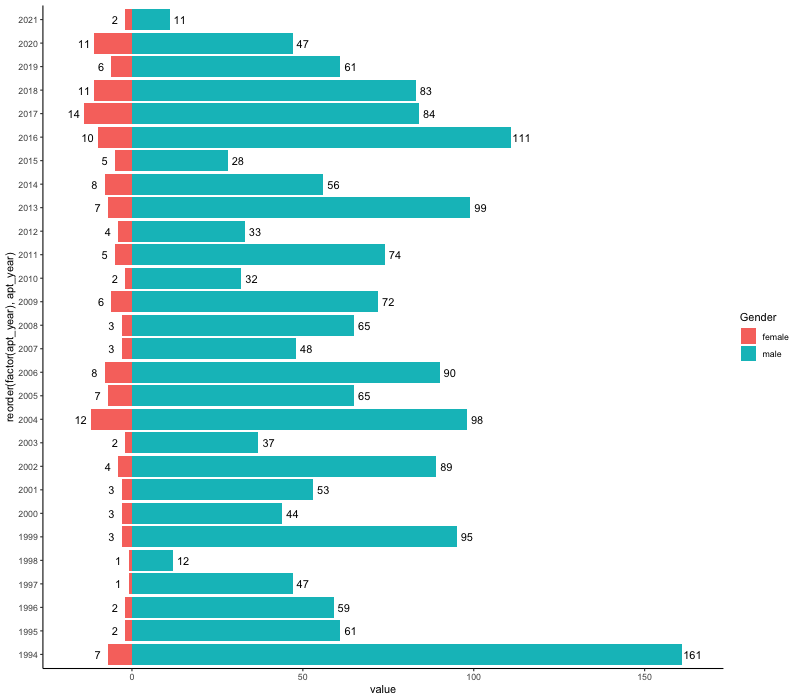

In [66]:
%%R -i year_wise -w 800 -h 700

ggplot(year_wise, aes(x = reorder(factor(apt_year), apt_year), y = value, fill = Gender, label=value)) +
  geom_col(data = subset(year_wise, Gender == "male"), stat = "identity") +
  geom_col(data = subset(year_wise, Gender == "female", stat = "identity"), aes(y=-value), stat = "identity") +
  geom_text(data = subset(year_wise, Gender == "male"), nudge_y=3) +
  geom_text(data = subset(year_wise, Gender == "female"), aes(y=-value), nudge_y=-3) +
  coord_flip() + theme_classic()



#ggsave("graphic1.pdf") 

In [52]:
year_wise3 = year_wise2.drop(columns=['value_y', "value", "value_x", "Gender_x", "Gender_y"])

In [53]:
year_wise3 = year_wise3.melt(id_vars='apt_year')
year_wise3

,apt_year,variable,value
0,1994,pct_female,4.17
1,1995,pct_female,3.17
2,1996,pct_female,3.28
3,1997,pct_female,2.08
4,1998,pct_female,7.69
5,1999,pct_female,3.06
6,2000,pct_female,6.38
7,2001,pct_female,5.36
8,2002,pct_female,4.30
9,2003,pct_female,5.13


In [54]:
year_wise4 = year_wise3.sort_values(by='apt_year', ascending=False)

In [60]:
%%R -i year_wise4 -w 800 -h 700

year_wise4$gender <- factor(year_wise4$variable, levels=c('pct_female', 'pct_male'))

# year_wise3 %>% filter(variable == "pct_female")
plot <- ggplot(year_wise4) + 
    aes( x=factor(apt_year), 
         y=value, 
         fill=fct_rev(gender), 
         label=paste(value) ) + 
    geom_col() +
    geom_text(data = year_wise4 %>% filter(variable == "pct_female"), 
              nudge_y=4) +
    coord_flip() +
    labs(x="Year of appointment", y='Percent of judges appointed')

#ggsave("graphic.pdf") 

Saving 11.1 x 9.72 in image


# Adding retirement year column

In [71]:
judges2['rtr_year'] = judges2.retirement_dt.dt.year

# Parent HC and Cadre of women judges

In [106]:
all_women_judges = judges2[judges2.Gender == "female"].reset_index(drop=True)
all_women_judges

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year,rtr_year
0,Bharati Sapru,female,2020-07-28 00:00:00+00:00,Allahabad,NaN,Bar,2005-10-05 00:00:00+00:00,2005,2020
1,Gandikota Sri Devi,female,2022-10-09 00:00:00+00:00,Allahabad,NaN,Service,2018-11-22 00:00:00+00:00,2018,2022
2,Jayashree Tiwari,female,2013-12-12 00:00:00+00:00,Allahabad,NaN,Service,2009-04-13 00:00:00+00:00,2009,2013
3,Kamal Kishore,female,2005-03-08 00:00:00+00:00,Allahabad,NaN,Service,1999-02-05 00:00:00+00:00,1999,2005
4,Laxmi Mohpatra,female,2016-06-09 00:00:00+00:00,Orissa,NaN,Bar,1999-09-16 00:00:00+00:00,1999,2016
...,...,...,...,...,...,...,...,...,...
147,Gyan Sudha Mishra,female,2014-04-27 00:00:00+00:00,Patna,2010-04-30T00:00:00Z,Bar,1994-03-16 00:00:00+00:00,1994,2014
148,Meenakshi Madan Rai,female,2026-07-11 00:00:00+00:00,Sikkim,NaN,Service,2015-04-15 00:00:00+00:00,2015,2026
149,Gandikota Sri Devi,female,2022-10-09 00:00:00+00:00,Allahabad,NaN,Service,2018-11-22 00:00:00+00:00,2018,2022
150,Hima Kohli,female,2021-09-01 00:00:00+00:00,Delhi,NaN,Bar,2006-05-29 00:00:00+00:00,2006,2021


In [111]:
cadre_location_women = all_women_judges.groupby('Parent High Court').Cadre.value_counts().unstack().fillna(0).reset_index()
cadre_location_women

Cadre,Parent High Court,Bar,Service
0,Allahabad,6.0,10.0
1,Andhra Pradesh,4.0,3.0
2,Bombay,7.0,7.0
3,Calcutta,6.0,4.0
4,Chhattisgarh,0.0,2.0
5,Delhi,9.0,13.0
6,Gauhati,1.0,2.0
7,Gujarat,5.0,4.0
8,Himachal Pradesh,4.0,0.0
9,J&K and Ladakh,1.0,0.0


In [116]:
cadre_location_women['Total'] = cadre_location_women['Bar'] + cadre_location_women['Service']
cadre_location_women

Cadre,Parent High Court,Bar,Service,Total
0,Allahabad,6.0,10.0,16.0
1,Andhra Pradesh,4.0,3.0,7.0
2,Bombay,7.0,7.0,14.0
3,Calcutta,6.0,4.0,10.0
4,Chhattisgarh,0.0,2.0,2.0
5,Delhi,9.0,13.0,22.0
6,Gauhati,1.0,2.0,3.0
7,Gujarat,5.0,4.0,9.0
8,Himachal Pradesh,4.0,0.0,4.0
9,J&K and Ladakh,1.0,0.0,1.0


In [119]:
cadre_location_women.to_csv('women_total.csv', index=False)

In [130]:
cadre_location_women.Bar.sum()

69.0

In [131]:
cadre_location_women.Service.sum()

80.0

# Parent HC and Cadre of men judges

In [112]:
all_men_judges = judges2[judges2.Gender == "male"].reset_index(drop=True)
all_men_judges

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year,rtr_year
0,Abdul Mateen,male,2013-12-13 00:00:00+00:00,Allahabad,NaN,Bar,2002-12-21 00:00:00+00:00,2002,2013
1,Abdul Moin,male,2030-10-31 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017,2030
2,Abdur Rahim Choudhary,male,1997-10-31 00:00:00+00:00,Calcutta,NaN,NaN,1994-03-28 00:00:00+00:00,1994,1997
3,Abhai Kumar,male,2018-10-06 00:00:00+00:00,Allahabad,NaN,Service,2016-04-07 00:00:00+00:00,2016,2018
4,Abhay Thipsay,male,2017-03-09 00:00:00+00:00,Bombay,NaN,Service,2011-03-17 00:00:00+00:00,2011,2017
...,...,...,...,...,...,...,...,...,...
1812,Sharad Kumar Sharma,male,2023-12-31 00:00:00+00:00,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00,2017,2023
1813,Sudhanshu Dhulia,male,2022-08-09 00:00:00+00:00,Uttarakhand,NaN,Bar,2008-11-01 00:00:00+00:00,2008,2022
1814,Tarun Agarwala,male,2018-03-02 00:00:00+00:00,Allahabad,NaN,Bar,2004-01-07 00:00:00+00:00,2004,2018
1815,Umesh Chandra Dhyani,male,2018-02-13 00:00:00+00:00,Uttarakhand,NaN,Service,2011-09-13 00:00:00+00:00,2011,2018


In [114]:
cadre_location_men = all_men_judges.groupby('Parent High Court').Cadre.value_counts().unstack().fillna(0).reset_index()
cadre_location_men

Cadre,Parent High Court,Bar,Service
0,Allahabad,169.0,164.0
1,Andhra Pradesh,58.0,30.0
2,Bombay,69.0,49.0
3,Calcutta,60.0,29.0
4,Chhattisgarh,15.0,11.0
5,Delhi,57.0,45.0
6,Gauhati,54.0,27.0
7,Gujarat,46.0,46.0
8,Himachal Pradesh,15.0,13.0
9,Hyderabad,3.0,1.0


In [117]:
cadre_location_men['Total'] = cadre_location_men['Bar'] + cadre_location_men['Service']
cadre_location_men

Cadre,Parent High Court,Bar,Service,Total
0,Allahabad,169.0,164.0,333.0
1,Andhra Pradesh,58.0,30.0,88.0
2,Bombay,69.0,49.0,118.0
3,Calcutta,60.0,29.0,89.0
4,Chhattisgarh,15.0,11.0,26.0
5,Delhi,57.0,45.0,102.0
6,Gauhati,54.0,27.0,81.0
7,Gujarat,46.0,46.0,92.0
8,Himachal Pradesh,15.0,13.0,28.0
9,Hyderabad,3.0,1.0,4.0


In [118]:
cadre_location_men.to_csv('men_total.csv', index=False)

In [128]:
cadre_location_men.Service.sum()

704.0

In [129]:
cadre_location_men.Bar.sum()

1044.0

# Merging Parent HC and Cadre

In [127]:
cadre_location_women.merge(cadre_location_men,on='Parent High Court', how="right").fillna(0).to_csv('total_cadre_location.csv', index='False')

In [135]:
total_cadre_location = cadre_location_women.merge(cadre_location_men,on='Parent High Court', how="right").fillna(0)
total_cadre_location

Cadre,Parent High Court,Bar_x,Service_x,Total_x,Bar_y,Service_y,Total_y
0,Allahabad,6.0,10.0,16.0,169.0,164.0,333.0
1,Andhra Pradesh,4.0,3.0,7.0,58.0,30.0,88.0
2,Bombay,7.0,7.0,14.0,69.0,49.0,118.0
3,Calcutta,6.0,4.0,10.0,60.0,29.0,89.0
4,Chhattisgarh,0.0,2.0,2.0,15.0,11.0,26.0
5,Delhi,9.0,13.0,22.0,57.0,45.0,102.0
6,Gauhati,1.0,2.0,3.0,54.0,27.0,81.0
7,Gujarat,5.0,4.0,9.0,46.0,46.0,92.0
8,Himachal Pradesh,4.0,0.0,4.0,15.0,13.0,28.0
9,Hyderabad,0.0,0.0,0.0,3.0,1.0,4.0


In [143]:
total_cadre_location.Bar_x.sum()

69.0

In [144]:
total_cadre_location.Service_x.sum()

80.0

In [145]:
total_cadre_location.Bar_y.sum()

1044.0

In [146]:
total_cadre_location.Service_y.sum()

704.0

# Judges with more than 1 year left in office

In [81]:
judges_rtr_post_2023 = judges2[judges2.rtr_year > 2023]
judges_rtr_post_2023

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year,rtr_year
1,Abdul Moin,male,2030-10-31 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017,2030
8,Ajai Kumar Srivastava,male,2025-05-31 00:00:00+00:00,Allahabad,NaN,Service,2021-03-25 00:00:00+00:00,2021,2025
11,Ajay Bhanot,male,2031-08-03 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017,2031
13,Ajit Kumar,male,2030-12-21 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017,2030
21,Alok Mathur,male,2026-11-15 00:00:00+00:00,Allahabad,NaN,Bar,2018-11-22 00:00:00+00:00,2018,2026
...,...,...,...,...,...,...,...,...,...
1927,Arindam Lodh,male,2025-03-24 00:00:00+00:00,Tripura,NaN,Bar,2018-05-07 00:00:00+00:00,2018,2025
1935,Alok Kumar Verma,male,2026-08-15 00:00:00+00:00,Uttarakhand,NaN,Service,2019-05-27 00:00:00+00:00,2019,2026
1950,Manoj Kumar Tiwari,male,2027-09-18 00:00:00+00:00,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00,2017,2027
1961,Ravi Malimath,male,2024-05-24 00:00:00+00:00,Karnataka,NaN,Bar,2008-02-18 00:00:00+00:00,2008,2024


In [91]:
judges_rtr_post_2023['years_of_HC_service'] = judges_rtr_post_2023.rtr_year - judges_rtr_post_2023.apt_year

# Women with more than 1 year of service left in HCs

In [92]:
in_office_women = judges_rtr_post_2023[judges_rtr_post_2023.Gender == 'female'].reset_index(drop=True)
in_office_women

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year,rtr_year,years_of_service_left,years_of_HC_service
0,Manju Rani Chauhan,female,2028-08-28 00:00:00+00:00,Allahabad,NaN,Bar,2018-11-22 00:00:00+00:00,2018,2028,10,10
1,Sadhna Rani,female,2024-05-15 00:00:00+00:00,Allahabad,NaN,Service,2021-03-25 00:00:00+00:00,2021,2024,3,3
2,Sangeeta Chandra,female,2030-04-22 00:00:00+00:00,Allahabad,NaN,Bar,2016-11-15 00:00:00+00:00,2016,2030,14,14
3,Sunita Agarwal,female,2028-04-29 00:00:00+00:00,Allahabad,NaN,Bar,2011-11-21 00:00:00+00:00,2011,2028,17,17
4,Lalitha Kanneganti,female,2033-05-04 00:00:00+00:00,Andhra Pradesh,NaN,Bar,2020-05-02 00:00:00+00:00,2020,2033,13,13
5,ANUJA PRABHUDESSAI,female,2024-02-07 00:00:00+00:00,Bombay,NaN,Service,2014-03-03 00:00:00+00:00,2014,2024,10,10
6,BHARATI DANGRE,female,2030-05-09 00:00:00+00:00,Bombay,NaN,Bar,2017-06-05 00:00:00+00:00,2017,2030,13,13
7,M. S. JAWALKAR,female,2026-05-25 00:00:00+00:00,Bombay,NaN,Service,2019-12-05 00:00:00+00:00,2019,2026,7,7
8,P. V. GANEDIWALA,female,2031-03-10 00:00:00+00:00,Bombay,NaN,Service,2019-02-13 00:00:00+00:00,2019,2031,12,12
9,REVATI MOHITE DERE,female,2027-04-16 00:00:00+00:00,Bombay,NaN,Bar,2013-06-21 00:00:00+00:00,2013,2027,14,14


# Women Slated for the Apex Court

In [95]:
in_office_women = in_office_women.drop(columns='years_of_service_left')

In [96]:
in_office_women[in_office_women.apt_year < 2013]

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year,rtr_year,years_of_HC_service
3,Sunita Agarwal,female,2028-04-29 00:00:00+00:00,Allahabad,NaN,Bar,2011-11-21 00:00:00+00:00,2011,2028,17
24,Bangalore Venkataramiah Nagarathna,female,2024-10-29 00:00:00+00:00,Karnataka,NaN,Bar,2008-02-18 00:00:00+00:00,2008,2024,16


# Men Slated for the Apex Court

In [97]:
in_office_men = judges_rtr_post_2023[judges_rtr_post_2023.Gender == 'male'].reset_index(drop=True)
in_office_men

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year,rtr_year,years_of_service_left,years_of_HC_service
0,Abdul Moin,male,2030-10-31 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017,2030,13,13
1,Ajai Kumar Srivastava,male,2025-05-31 00:00:00+00:00,Allahabad,NaN,Service,2021-03-25 00:00:00+00:00,2021,2025,4,4
2,Ajay Bhanot,male,2031-08-03 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017,2031,14,14
3,Ajit Kumar,male,2030-12-21 00:00:00+00:00,Allahabad,NaN,Bar,2017-09-22 00:00:00+00:00,2017,2030,13,13
4,Alok Mathur,male,2026-11-15 00:00:00+00:00,Allahabad,NaN,Bar,2018-11-22 00:00:00+00:00,2018,2026,8,8
...,...,...,...,...,...,...,...,...,...,...,...
365,Arindam Lodh,male,2025-03-24 00:00:00+00:00,Tripura,NaN,Bar,2018-05-07 00:00:00+00:00,2018,2025,7,7
366,Alok Kumar Verma,male,2026-08-15 00:00:00+00:00,Uttarakhand,NaN,Service,2019-05-27 00:00:00+00:00,2019,2026,7,7
367,Manoj Kumar Tiwari,male,2027-09-18 00:00:00+00:00,Uttarakhand,NaN,Bar,2017-05-19 00:00:00+00:00,2017,2027,10,10
368,Ravi Malimath,male,2024-05-24 00:00:00+00:00,Karnataka,NaN,Bar,2008-02-18 00:00:00+00:00,2008,2024,16,16


In [100]:
in_office_men = in_office_men.drop(columns='years_of_service_left')

In [101]:
in_office_men[in_office_men.apt_year < 2013].reset_index(drop=True)

,Name of the Judge,Gender,retirement_dt,Parent High Court,Date of appointment to the Supreme Court,Cadre,appointment_dt,apt_year,rtr_year,years_of_HC_service
0,Biswanath Somadder,male,2025-12-14 00:00:00+00:00,Calcutta,NaN,Bar,2006-06-22 00:00:00+00:00,2006,2025,19
1,Devendra Kumar Upadhyaya,male,2027-06-15 00:00:00+00:00,Allahabad,NaN,Bar,2011-11-21 00:00:00+00:00,2011,2027,16
2,Manoj Misra,male,2027-06-01 00:00:00+00:00,Allahabad,NaN,Bar,2011-11-21 00:00:00+00:00,2011,2027,16
3,Ramesh Sinha,male,2026-09-04 00:00:00+00:00,Allahabad,NaN,Bar,2011-11-21 00:00:00+00:00,2011,2026,15
4,Vikram Nath,male,2024-09-23 00:00:00+00:00,Allahabad,NaN,Bar,2004-09-24 00:00:00+00:00,2004,2024,20
5,Joymalya Bagchi,male,2028-10-02 00:00:00+00:00,Calcutta,NaN,Bar,2011-06-27 00:00:00+00:00,2011,2028,17
6,P.V.Sanjay Kumar,male,2025-08-13 00:00:00+00:00,Andhra Pradesh,NaN,Bar,2008-08-08 00:00:00+00:00,2008,2025,17
7,Dhananjaya Chandrachud,male,2024-11-10 00:00:00+00:00,Bombay,2016-05-13T00:00:00Z,Bar,2000-03-29 00:00:00+00:00,2000,2024,24
8,DIPANKAR DATTA,male,2027-02-08 00:00:00+00:00,Calcutta,NaN,Bar,2006-06-22 00:00:00+00:00,2006,2027,21
9,NITIN JAMDAR,male,2026-01-09 00:00:00+00:00,Bombay,NaN,Bar,2012-01-23 00:00:00+00:00,2012,2026,14


After subtracting the number of 5 men who have already ascended to the Supreme Court, the two women have competition from 50 men in making it to the apex court.